# What Makes a Second-Half Team?
### Developing a "Resilience" Metric for NCAA Basketball
### Henry Tessier

<div align="center"><img src="https://lh3.googleusercontent.com/botptFTCHwUBMYFb-oFDGhJNBF73_DEI7MfLUHhshqbMH_4aQn9EmR6KryBGu0ltka42aNUspq7T28AbMlg8EdwwDzsIKj9-o3pwBCtlL8Z6nNidnvoAxTjU055KSqqaAFVBEWYOVF3q7Q07-rQzM0LOAEgyFHdp4Jg2W7O-Hyywq5HHUwOxkCzo49lCTUBIRyPL_Jc7-ZPcnsAmEO9nntsCqJyNIFixQHkXCXTAoFtw1Zze3e3dIAHKrbsAGOySG4avW656VELM3xykNkBJ33jKGirQI4SxQ864I523_64wldNGptPzAN2TK2yWgJYCCH-ty4txrXITWljB3OO6YPioeVEjVpYrnnfs-62jFGf95tPu7B4ZfkiET2Xb9TZTKkuzhim7lswZqOW9nsD7WmyAVbS_u5bX6fWPrMUce5qVPR6aCv8_1WW-TWy__dhT7mcX9wt2_y09x5_vsV-pN-mpmOMl8dgbKMVqSdNoDttpmoEMJtcHK94ND6i_iGyp7VTpLVEuOdrgCbIpWdaxLtr3MQFJNadTu4rm6UVPv1iCuBP9kuQ-12znMneNapz2XtwsORf_XlXtVRYKREfhiqs1E6pFe5dKB1BtpvfU7ETLNYTofqxz3opZTgHAS_BZhtuD3QL_e3BhX7IMZ6mBt5P4IRbKOhmtQx8s__0YM1_l2z5kFqsiWciEI7hX=w1583-h969-no" width="750px"/>
Photo by Markus Spiske on Unsplash</div>

# 1. Introduction

In the world of sports analytics there are thousands of metrics to quantify the skill level of a team. From the work of Ken Pomeroy, Bart Torvik, Kenneth Massey, Jeff Sagarin, and the tons of other basketball statheads, the art of determining the better basketball team has been nearly perfected. At this point, the only way betting lines are going to get more accurate is if we start collecting stats on what players ate for lunch on gameday. 

When it comes to March Madness though, it sometimes feels as though all prior knowledge is thrown out the window. Beyond all the machine learning models and ELO rankings, are there other unmeasurables that lead a team to having NCAA Tournament success, and how can we find a way to measure them?

In this notebook, I propose a "**resilience**" metric to quantify the ability of a team to perform at its best during the most crucial moments in a game. In sports, we often talk about a team 'peaking at the right time' in the context of a season, meaning that they're playing at their best right when the post-season starts. What about peaking at the right time in the context of a game though? 

**Resilience seeks to measure when throughout a game a team performs at its best.** Teams with positive resilience scores are best near the end of games, teams with negative scores are worst at the end of games, and teams with scores close to zero are even-keeled throughout the entire game. One way to think about resilience is as a measure of how much a team is a "first-half team" or "second-half team".

By being able to put a number to this idea, we are not only able to verify fan theories that their team is a "second-half team and will *surely manage to comeback*", but also start to get at the causes behind these types of performances, such as team fitness, bench depth, and emotional resilience (hence the name of our metric).   

# 2. Resilience Summary

The resilience metric is independent of team skill and strength-of-schedule, meaning that it is unaffected by the overall performance of a team as reflected by its point differential in games. Maintaining this independence ensures that resilience truly measures a unique feature of team performance not already explained by its own skill level or the skill level of its opponents.

**In this analysis, it is determined that resilience has no use as a pre-game predictor of the outcome of games, but that it does have a significant impact on mid-game win probabilities. As a result, this metric has use in live win-probability and in-play betting models.**

The resilience metric is calculated as follows:

1. Dividing the 40 minute basketball game into 2.5 minute periods<sup>1</sup> — 16 periods in total (or more if the team has played in any overtime games during the season. Overtimes are 5 minutes each).

    <img src="https://lh3.googleusercontent.com/OqiTSbtA3SrFhGnz4FhRzHo_ve8oYHOOijQNM2oLBvag_laTaLNX2U-kCj4WNCfR5IM9A4Q7cc_2ZjQBQfyszcNcuJmo98LZFkVTXdg4Z8SlFAIAYvcIwfhO24nJpKnrF5Pvh5mERR8K_bA__JMoXf7UnxPY2KI4rhqHKzGHzllNQtcgMPN7KfAKJx5v-cVP4ujEPm_4rfiBTrKRt_f7kGBVI9bxvslop0CHu3-m4r7oH8eU-UiUHan2Jtg0wZdTKBaH5sKEbihySyI5fkKxYgWWum669fUjzphGvADcI-86gJV9fd9otyx933sbAjhxdmlBWtoPIEh8qj2LHSGy60U0bZjOV5qQOWeXElQx1OqhGkpBwemNQh5j1J6yktZET5QoAsICaWAxRLDANwimj1jseP3UK8Gchq4q9SyB1Im0KQn3apvjSci3j_ETUVooe8goJbnsR-PPuyMQNC9D6eYZN_maR6Kg3LohoV2XlJmB5-O_fqxS4QMOMQO8YiuqX06gpw2cJcFmTRX6KxUUgzYjvAQIl3KbgkafzCV0C1HQhAa5-IThnnkhkI3Z8fvOduM0gb51pZD1OhYuYwf0uaEBUFAHgpu0rZY3g3eCdxx3Ed7kB_mdkHSdjeeFuMK8RmC5kE_RZMOPQea70Z1QEXg9AW7Hxl1b1CgjrOczSISG5xIiR-y9tD2Okz6j=w1084-h566-no" width="750px"/>

2. Finding the team's average point differential (number of points scored minus points allowed) during each of these periods across all of its games.

3. Subtracting each period's point differential from the team's average regulation-time point differential. By doing this partial standardization, the point differentials no longer reflect how the team does in each period relative to its opponents, but instead how the team does in each period relative to its own average performance.

4. Weighting overtime periods relative to the number of overtime games played so that a small number of OT periods does not have a disproportionate impact on the overall score.

5. Fitting a simple linear regression to the ordered point differentials.

6. Taking the slope of the fitted linear model multiplied by 100 (for easier interpretation of the values) as our final resilience score. In essence, resilience is the trend in average point differentials over the course of the game. 

<p style="font-size:13px"><sup>1</sup> 2.5 minute periods were chosen because of their even division of both 20 minute halves and 5 minute overtimes. The first alternative, 1 minute periods, were too fine to display noticeable trends across games, as over the course of 1 minute a team is only expected to have 1-2 possessions. While the other alternative, 5 minute periods, solved this issue, it too broadly aggregated the data, only giving us 8 data points per game.</p>

In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import ttest_rel, ttest_ind, chi2_contingency
from scipy import stats
pd.options.display.max_rows = 500
plt.style.use('fivethirtyeight')

In [ ]:
#create TeamID to name dictionary
team_names = pd.read_csv('../input/march-madness-analytics-2020/MDataFiles_Stage2/MTeams.csv')
team_names = team_names[['TeamName','TeamID']]
team_dict = dict(zip(team_names.TeamID, team_names.TeamName))

# 3. Data

To create the resilience metric, we rely solely on play-by-play data for each season. This data contains the actions that occurred across all games throughout the season. Among the fields included in the data are the season, winning team ID, and losing team ID, which together are sufficient to identify each unique game, as well as the score at the time of the event, the number of elapsed seconds that have occurred in the game at the time of the event, and the type of event that occurred.

Men's basketball data was the focus of this analysis due to the later use of data from KenPom<sup>1</sup>, but this work should be replicated with the women's data using similar skill and strength of schedule metrics from another source.

<p style="font-size:13px"><sup>1</sup> <a href="https://kenpom.com/">https://kenpom.com/</a></p>

In [ ]:
def clean_plays(playframe, team_dict):
    """Clean play by play dataframe for entire season"""
    
    df = playframe.copy()
    
    #map team IDs to team names
    df.WTeamID = df.WTeamID.map(team_dict)
    df.LTeamID = df.LTeamID.map(team_dict)
    df.EventTeamID = df.EventTeamID.map(team_dict)
    
    #filter unnecessray columns
    df = df[['EventID','Season','DayNum','WTeamID','LTeamID','WCurrentScore','LCurrentScore','ElapsedSeconds','EventType']]
    
    #remove all non-scoring event types
    df = df[df.EventType.isin(['made1','made2','made3'])]
    
    #create unique game IDs
    df['GameID'] = df.groupby(['Season','DayNum','WTeamID','LTeamID']).grouper.group_info[0]
    
    #change buzzer-beater scores ElapsedSeconds to be slightly before end of time (for correct game minute calc)
    df.loc[(df.ElapsedSeconds == 1200), 'ElapsedSeconds'] = 1199.99 #Halftime
    df.loc[(df.ElapsedSeconds == 2400), 'ElapsedSeconds'] = 2399.99 #End Regulation
    df.loc[(df.ElapsedSeconds == 2700), 'ElapsedSeconds'] = 2699.99 #End OT1
    df.loc[(df.ElapsedSeconds == 3000), 'ElapsedSeconds'] = 2999.99 #End OT2
    df.loc[(df.ElapsedSeconds == 3300), 'ElapsedSeconds'] = 3299.99 #End OT3
    df.loc[(df.ElapsedSeconds == 3700), 'ElapsedSeconds'] = 3699.99 #End OT4
    
    #calculate game period
    df['Period'] = df['ElapsedSeconds'] // 150

    return df

#read in 2020 data
plays20 = pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2020.csv')
clean_M20 = clean_plays(plays20, team_dict)

In [ ]:
plays20.EventType.value_counts().plot(kind='bar')
plt.title('2019-2020 Season Event Counts by Type')
plt.show()

From the figure above we observe that the bulk of event types are non-scoring events such as substitutions, rebounds, and fouls. Because we are only interested in calculating point differentials, we can discard all non-scoring events, leaving us with only 'made1', 'made2', and 'made3' events.

Another necessary cleaning step is to modify the 'ElapsedSeconds' field to account for buzzer beating plays. Because floor division (rounding down) will be used to calculate which period each play falls into, a small value must be subtracted for buzzer-beaters so that they are not incorrectly marked as occurring in the following period.

In [ ]:
def get_game(clean_plays_df, gameID, teamName):
    """Given a team and game, return point differentials for each period"""
    
    temp = clean_plays_df[clean_plays_df.GameID == gameID].sort_values('ElapsedSeconds')
    temp = temp[['WTeamID','LTeamID','WCurrentScore','LCurrentScore','Period']]
    
    #find last minute recorded in data (determine number of OTs)
    upper = max(temp.Period)
    #reindex to fill in missing minutes where no team scored depending on number of OTs
    if upper < 16:
        #get last score for each minute
        temp = temp.groupby('Period').last().reindex(index=range(0,16), method = 'ffill')
    elif upper < 18:
        temp = temp.groupby('Period').last().reindex(index=range(0,18), method = 'ffill')
    elif upper < 20:
        temp = temp.groupby('Period').last().reindex(index=range(0,20), method = 'ffill')
    elif upper < 22:
        temp = temp.groupby('Period').last().reindex(index=range(0,22), method = 'ffill')
    elif upper < 24:
        temp = temp.groupby('Period').last().reindex(index=range(0,24), method = 'ffill')
    elif upper < 26:
        temp = temp.groupby('Period').last().reindex(index=range(0,26), method = 'ffill')
    
    #fill missing values
    temp[['WTeamID','LTeamID']] = temp[['WTeamID','LTeamID']].bfill()
    temp[['WCurrentScore','LCurrentScore']] = temp[['WCurrentScore','LCurrentScore']].fillna(0)
    
    #fix data issue where LCurrentScore and WCurrentScore values are swapped
    winning_final = temp.WCurrentScore.iloc[-1]
    losing_final = temp.LCurrentScore.iloc[-1]

    if winning_final < losing_final:
        temp.loc[a.index[-1], 'WCurrentScore'] = losing_final
        temp.loc[a.index[-1], 'LCurrentScore'] = winning_final
    
    #calc period point differentials for each team
    temp['Diff'] = temp.WCurrentScore - temp.LCurrentScore
    temp['WScoreDiff'] = temp['Diff'].diff()
    temp['LScoreDiff'] = temp['Diff'].diff() * -1
    
    #point diffs for first period
    min1diff = temp['WCurrentScore'][0] - temp['LCurrentScore'][0]
    temp.loc[0, 'WScoreDiff'] = min1diff
    temp.loc[0,'LScoreDiff'] = min1diff * -1
    
    #return column for team we're interested in
    if teamName == temp.loc[0, 'WTeamID']:
        rel =  temp['WScoreDiff']
    elif teamName == temp.loc[0, 'LTeamID']:
        rel =  temp['LScoreDiff']
    
    return rel 

def find_team_games(team, playsframe):
    """find all games in which a team played during the season"""
    return playsframe[(playsframe.WTeamID == team) | (playsframe.LTeamID == team)].GameID.unique()

def generate_series(Team_Name, play_frame):
    """Given a team and clean play by play dataframe return differentials dataframe"""
    
    games = find_team_games(Team_Name, play_frame)
    diff_list = []
    for GameID in games:
        diff_list += [list(get_game(play_frame, GameID, Team_Name))]
    diff_frame = pd.DataFrame(diff_list).transpose()

    differentials = pd.DataFrame({'Differential':diff_frame.mean(axis=1)})
    differentials = differentials - differentials[:16].mean()
    
    game_counts = pd.DataFrame({'Games':diff_frame.count(axis = 1)})
    return differentials.join(game_counts)

def resilience_score(Team_Name, play_frame):
    """Given a team and clean play by play dataframe calculate team's resileince score for season"""
    
    resil_df = generate_series(Team_Name, play_frame)
    resil_df['GameWeight'] = resil_df['Games'] / max(resil_df['Games']) #adjust weight of OTs based on num games played
    resil_df['WeightedDifferential'] = resil_df['GameWeight'] * resil_df['Differential'] #recalc weighted point differentials
    resil = stats.linregress(y = resil_df['WeightedDifferential'], x = resil_df.index)[0] #return slope of linear regression
    return resil * 100
    
def plot_team(Team_Name, play_frame):
    """Given a team and clean play by play dataframe plot point standardized point differentials"""
    
    df = generate_series(Team_Name, play_frame)
    df['GameWeight'] = df['Games'] / max(df['Games'])
    df['WeightedDifferential'] = df['GameWeight'] * df['Differential']
    pal = sns.color_palette('RdBu_r', len(df))
    rank = df.Differential.argsort().argsort()
    g = sns.barplot(y = 'WeightedDifferential', x = df.index, data = df, palette = np.array(pal[::-1])[rank])
    g = sns.regplot(y = 'WeightedDifferential', x = df.index, data = df, scatter = False, ci=None, line_kws={'color':'g', 'lw':3})
    plt.title(Team_Name)
    plt.ylabel('Point Differential')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.axvline(7.5, color = 'green', ls = '--', linewidth = 1)
    bottom = min(df.WeightedDifferential) - (max(df.WeightedDifferential) - min(df.WeightedDifferential))/10
    plt.text(2, bottom , '1st Half')
    plt.text(10, bottom, '2nd Half')
    if len(df) > 16:
        plt.axvline(15.5, color = 'green', ls = '--', linewidth = 1)
        if len(df) > 18:
            plt.text(17, bottom, 'OT')
        else:
            plt.text(16, bottom, 'OT')  
    plt.show()

After cleaning the data, we are ready to calculate resilience scores for each team. However, after doing so, we need to verify that our metric is independent of skill and strength of schedule. This is important because we are seeking to measure something not already described by skill or strength of schedule metrics, and therefore want to avoid any accidental correlation. To do so, we will compare our metric with two statistics from Ken Pomeroy: AdjEM<sup>1</sup> (adjusted efficiency margin - which we will use as a measure of team skill) and SOS (strength of schedule<sup>2</sup>).

<p style="font-size:13px"><sup>1</sup> <a href="https://kenpom.com/blog/ratings-methodology-update/">https://kenpom.com/blog/ratings-methodology-update/</a><br>
<sup>2</sup> <a href="https://en.wikipedia.org/wiki/Strength_of_schedule">https://en.wikipedia.org/wiki/Strength_of_schedule</a></p>

In [ ]:
def complete_season_data(team_dict, play_frame):
    teams = []
    resilience = []
    for team in team_dict.values():
        try:
            resilience += [resilience_score(team, play_frame)]
            teams += [team]
        except: #not all teams were D1 for all seasons in data
            pass
    resiliences = pd.DataFrame({'Team':teams, 'Resilience':resilience})
    resiliences = resiliences.sort_values('Resilience', ascending=False).reset_index(drop=True)
    return resiliences

resilience_df = complete_season_data(team_dict, clean_M20)

In [ ]:
kenpom20 = pd.read_csv('../input/kpom2020/kpom20.csv')
merged = kenpom20.merge(resilience_df)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.regplot(x = 'AdjEM', y = 'Resilience', data = merged, ci=None, line_kws={'color':'red', 'lw':2}, ax = ax[0])
sns.regplot(x = 'SOS', y = 'Resilience', data = merged, ci=None, line_kws={'color':'red', 'lw':2}, ax = ax[1])
fig.suptitle('Skill and Strength of Schedule vs Resilience')
fig.show()

From the above plots, we observe that there is no correlation between resilience and SOS, however there is somewhat of a negative relationship between resilience and AdjEM. Unless we believe that more skilled teams are simply worse at the end of games, this may be the product of another factor at play. 

One possible explanation is the "garbage-time theory", that in blowout games, the final few minutes are non-competitive and pointless, thus skewing the data. A further explanation of this theory is as follows:

1. Team A is better than Team B and therefore has a large lead going into the final 5 minutes of the game.
2. With a win guaranteed, Team A takes their starting players out of the game and substitutes in players that usually don't play in close games (less-skilled, younger, non-scholarship, etc.).
3. While Team B may also substitute out their star players, the skill gap between the two teams is now more even and the stakes are lower, resulting in a point differential more favorable to Team B in these final minutes compared to the rest of the game.
4. Team B performs better in these final few minutes of the game which makes their resilience score increase and Team A's resilience score decrease.

To see if this is the case, we can remove all garbage-time game data where the point differential was insurmountable from our resilience metric calculation, and see if the correlation changes. To determine if a game is a blowout, we'll use a garbage-time method developed by Bill James<sup>1</sup>. At each period of the game, we'll check whether or not it has officially entered garbage time (the game is a blowout), and if it has, discard that data for calculation of our resilience metric.

<p style="font-size:13px"><sup>1</sup> <a href="http://www.slate.com/articles/sports/sports_nut/2008/03/the_lead_is_safe.single.html">http://www.slate.com/articles/sports/sports_nut/2008/03/the_lead_is_safe.single.html</a></p>

In [ ]:
#change functions to remove blowout games
def get_game(clean_plays_df, gameID, teamName):
    """Given a team and game, return point differentials for each period"""
    
    temp = clean_plays_df[clean_plays_df.GameID == gameID].sort_values('ElapsedSeconds')
    temp = temp[['WTeamID','LTeamID','WCurrentScore','LCurrentScore','Period']]
    
    #find last minute recorded in data (determine number of OTs)
    upper = max(temp.Period)
    #reindex to fill in missing minutes where no team scored depending on number of OTs
    if upper < 16:
        #get last score for each minute
        temp = temp.groupby('Period').last().reindex(index=range(0,16), method = 'ffill')
    elif upper < 18:
        temp = temp.groupby('Period').last().reindex(index=range(0,18), method = 'ffill')
    elif upper < 20:
        temp = temp.groupby('Period').last().reindex(index=range(0,20), method = 'ffill')
    elif upper < 22:
        temp = temp.groupby('Period').last().reindex(index=range(0,22), method = 'ffill')
    elif upper < 24:
        temp = temp.groupby('Period').last().reindex(index=range(0,24), method = 'ffill')
    elif upper < 26:
        temp = temp.groupby('Period').last().reindex(index=range(0,26), method = 'ffill')
    
    #fill missing values
    temp[['WTeamID','LTeamID']] = temp[['WTeamID','LTeamID']].bfill()
    temp[['WCurrentScore','LCurrentScore']] = temp[['WCurrentScore','LCurrentScore']].fillna(0)
    
    #fix data issue where LCurrentScore and WCurrentScore values are swapped
    winning_final = temp.WCurrentScore.iloc[-1]
    losing_final = temp.LCurrentScore.iloc[-1]
    if winning_final < losing_final:
        temp.loc[a.index[-1], 'WCurrentScore'] = losing_final
        temp.loc[a.index[-1], 'LCurrentScore'] = winning_final
    
    #calc period point differentials for each team
    temp['Diff'] = temp.WCurrentScore - temp.LCurrentScore
    temp['WScoreDiff'] = temp['Diff'].diff()
    temp['LScoreDiff'] = temp['Diff'].diff() * -1
    
    #point diffs for first period
    min1diff = temp['WCurrentScore'][0] - temp['LCurrentScore'][0]
    temp.loc[0, 'WScoreDiff'] = min1diff
    temp.loc[0,'LScoreDiff'] = min1diff * -1

    #calculate blowout index 
    temp['BlowoutScore'] = np.sqrt(2400 - 150*(temp.reset_index().Period.iloc[:15] + 1)) + 2.5 < temp.Diff.iloc[:15]
    if temp['BlowoutScore'].iloc[:15].any():
        return None
    
    #return column for team we're interested in
    if teamName == temp.loc[0, 'WTeamID']:
        rel =  temp['WScoreDiff']
    elif teamName == temp.loc[0, 'LTeamID']:
        rel =  temp['LScoreDiff']
        
    return rel

def generate_series(Team_Name, play_frame):
    """Given a team and clean play by play dataframe return differentials dataframe"""
    
    games = find_team_games(Team_Name, play_frame)
    diff_list = []
    for GameID in games:
        try:
            diff_list += [list(get_game(play_frame, GameID, Team_Name))]
        except:
            pass
    diff_frame = pd.DataFrame(diff_list).transpose()

    differentials = pd.DataFrame({'Differential':diff_frame.mean(axis=1)})
    differentials = differentials - differentials[:16].mean()
    
    game_counts = pd.DataFrame({'Games':diff_frame.count(axis = 1)})
    return differentials.join(game_counts)

In [ ]:
resilience_df = complete_season_data(team_dict, clean_M20)
merged = kenpom20.merge(resilience_df)

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12,6))
sns.regplot(x = 'AdjEM', y = 'Resilience', data = merged, ci=None, line_kws={'color':'red', 'lw':2}, ax = ax[0])
sns.regplot(x = 'SOS', y = 'Resilience', data = merged, ci=None, line_kws={'color':'red', 'lw':2}, ax = ax[1])
fig.suptitle('Skill and Strength of Schedule vs Resilience (Blowout Adjusted)')
fig.show()

In [ ]:
model = sm.OLS(merged.Resilience, merged.AdjEM).fit()
model.summary()

After removing blowout game data and re-plotting resilience versus AdjEM and SOS, we now observe no relationship between team skill and resilience. To verify, we fit a simple linear regression. From the near-zero coefficient and high P-value, we can be more confident in our corrected resilience metric.

# 4. Point Differentials and 2019-20 Season

Once we have cleaned the data, identified which games belong to which teams, and followed the steps for finding point differentials across each period, we can visualize each team's point differentials to better understand the data behind the resilience scores. Theoretically, we should be able to anticipate the resilience score of a team from the point differentials graph.

Here is an example using UVA:

In [ ]:
plot_team('Virginia', clean_M20)

The above graph shows Virginia's average point differential in each of the 2.5 minute periods relative to its own average performance. Based on the graph, UVA plays its worst in the minutes right before and immediately after halftime, as well as in the final 5 minutes of the game and in any overtime. Overall, UVA has only a slightly negative performance trend (the green line) over the course of the game, so while we know UVA has a negative resilience score, it's likely not too extreme. Lets see UVA's actual resilience:

In [ ]:
resilience_df[resilience_df.Team == 'Virginia']

UVA has a resilience score of -1.4, which is 245th in Division 1 (out of 353 total teams).

Now that scores have been calculated for all teams in the 2019-2020 season, lets look at the teams with the highest and lowest scores.

In [ ]:
resilience_df.head()

In [ ]:
plot_team('Maryland', clean_M20)

In [ ]:
resilience_df.tail()

In [ ]:
plot_team('Penn St',clean_M20)

Our look at the point differential graph of the #1 team, Maryland, shows that they start out slow but get better as the game goes on, performing at their best in the final couple minutes of the game. Meanwhile, the last place team, Penn St, usually struggles for much of the second half. 

Here are the entire rankings for this season:

In [ ]:
resilience_df.style.background_gradient(cmap='RdBu')

In [ ]:
resilience_df.to_csv('M20.csv', index=False)

# 5. Insights and Predictive Power

Now that the resilience metric has been developed, it's important to examine its usefulness. Does resilience have any actual bearing on the outcome of games? If a team is unstoppable at the end of a game, does it really matter if they already dug themselves deep into a hole in the first half? Conversely, why should it matter if a team performs at its worst in the final few minutes of a game if they already have an insurmountable lead?

In this section, we will dive deeper into the usefulness of a resilience metric and what it can tell us about a team's performance. Although it has no relation to overall regular season skill, what about outcomes in close games? Or during tournament games? Do resilient teams have the ability to cause or avoid upsets?

In [ ]:
#read in historical data, remove tournament data, calculate resilience scores
clean_M19 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2019.csv'), team_dict)
clean_M19 = clean_M19[clean_M19.DayNum < 133]
resilience_19 = complete_season_data(team_dict, clean_M19)

clean_M18 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2018.csv'), team_dict)
clean_M18 = clean_M18[clean_M18.DayNum < 133]
resilience_18 = complete_season_data(team_dict, clean_M18)

clean_M17 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2017.csv'), team_dict)
clean_M17 = clean_M17[clean_M17.DayNum < 133]
resilience_17 = complete_season_data(team_dict, clean_M17)

clean_M16 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2016.csv'), team_dict)
clean_M16 = clean_M16[clean_M16.DayNum < 133]
resilience_16 = complete_season_data(team_dict, clean_M16)

clean_M15 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2015.csv'), team_dict)
clean_M15 = clean_M15[clean_M15.DayNum < 133]
resilience_15 = complete_season_data(team_dict, clean_M15)

#Add year column prior to merge
resilience_19['Year'] = '2019'
resilience_18['Year'] = '2018'
resilience_17['Year'] = '2017'
resilience_16['Year'] = '2016'
resilience_15['Year'] = '2015'

#merge
historical_resilience = pd.concat([resilience_19, resilience_18, resilience_17, resilience_16, resilience_15], ignore_index=True)
historical_resilience.to_csv('HistoricalResilience.csv', index=False)

To begin a historical analysis, we need to calculate resilience scores for teams in all years for which we have both play-by-play data and tournament results: the 2014-15 season through the 2018-19 season. Then, we'll filter down the data to only teams that made the NCAA tournament. Tournament games will not be included in the calculation of the resilience metric since we are interested in using resilience for tournament prediction and thus do not want the scores influenced by these games.

### Tournament Game Prediction

To start, we'll examine resilience versus tournament seed, performance against the point spread<sup>1</sup>, and difference in resiliencies between winning and losing teams. Unless a team's skill in the regular season does not translate to the NCAA tournament, we would expect no correlation between resilience and any of these variables since resilience is skill-independent.

<p style="font-size:13px"><sup>1</sup> Point spreads are determined by sportsbook operators prior to the start of a game and act as equilibrium points to try and split bets 50/50. For example, if UVA is a 3 point favorite over Virginia Tech (point spread = UVA -3.0), and UVA only wins the game by 1 point, then we can say that Virginia Tech "covered the spread" by performing 2 points better than expected. It is important for sportsbook operators to set highly accurate point spreads, because if bettors can systemically predict the outcome of games better than sportsbooks, the sportsbooks may lose money. Consequently, point spreads have historically been the most accurate predictions of the outcome of games.<br><br>

More information on point-spreads can be found here: <a href="https://en.wikipedia.org/wiki/Spread_betting#Sports_spread_betting">https://en.wikipedia.org/wiki/Spread_betting#Sports_spread_betting</a><br>

Point spread data is from: <a href="http://www.thepredictiontracker.com/basketball.php">http://www.thepredictiontracker.com/basketball.php</a> and <a href="https://www.oddsshark.com/ncaab/database">https://www.oddsshark.com/ncaab/database</a></p>

In [ ]:
seeds = pd.read_csv('../input/march-madness-analytics-2020/MDataFiles_Stage2/MNCAATourneySeeds.csv')
seeds = seeds[seeds.Season >= 2015].reset_index(drop=True)
seeds['Team'] = seeds['TeamID'].map(team_dict)
seeds['Seed'] = seeds['Seed'].apply(lambda x: ''.join([digit for digit in x if digit.isdigit()])).astype(int)
seeds = seeds[['Season','Seed','Team']]
seeds.columns = ['Year','Seed','Team']

#match resilience dtypes
historical_resilience['Year'] = historical_resilience['Year'].astype('int')
historical_resilience['Team'] = historical_resilience['Team'].astype('str')

#merge dataframes
res_seed = seeds.merge(historical_resilience, left_on = ['Team','Year'], right_on = ['Team','Year'])

sns.regplot(x = 'Seed', y = 'Resilience', data = res_seed, ci=None, line_kws={'color':'red', 'lw':2})
plt.title('Resilience vs NCAA Tournamet Seed (Since 2015)')
plt.show()

Because teams are seeded according to perceived skill (by the selection committee), and there is no correlation between skill and resilience, we should see the same for seed and resilience which is shown by the lack of a relationship in the above plot.

In [ ]:
spreads = pd.read_csv('../input/tournamentpointspreads/Spreads.csv')

spreads['WResilience'] *= 100
spreads['LResilience'] *= 100

resilience = []
performance = []
for index, row in spreads.iterrows():
    resilience += [row.WResilience]
    performance += [row.Wspread - row.TrueSpread]
    resilience += [row.LResilience]
    performance += [(row.Wspread - row.TrueSpread)*-1]
    
spread_performance = pd.DataFrame({'Resilience':resilience, 'Performance':performance})

sns.regplot(x = 'Resilience', y = 'Performance', data = spread_performance, ci=None, line_kws={'color':'red', 'lw':2})
plt.title('Performance (Against Point Spread)\nvs Resilience')
plt.show()

If teams perform according to their skill level in the tournament (skill gap between two teams is reflected by the point-spread) there should be no relationship to resilience, again seen in the above plot. This tells us that resilience is not an indicator of over or underperformance in tournament games.

In [ ]:
#read in and clean tournament game results data
results = pd.read_csv('../input/march-madness-analytics-2020/MDataFiles_Stage2/MNCAATourneyCompactResults.csv')
results['WTeamID'] = results['WTeamID'].map(team_dict)
results['LTeamID'] = results['LTeamID'].map(team_dict)
results = results[results.Season >= 2015].reset_index()
results = results[['Season','WTeamID','LTeamID','WScore','LScore']]

results = results.merge(res_seed, left_on = ['WTeamID','Season'], right_on = ['Team','Year'])
results = results[['Year','WTeamID','LTeamID','WScore','LScore','Seed','Resilience']]
results.columns = ['Year','WTeam','LTeam','WScore','LScore','WSeed','WResilience']
results = results.merge(res_seed, left_on = ['Year','LTeam'], right_on = ['Year','Team'])
results = results[['Year','WTeam','LTeam','WSeed','Seed','WResilience','Resilience','WScore','LScore']]
results.columns = ['Year','WTeam','LTeam','WSeed','LSeed','WResilience','LResilience','WScore','LScore']

results.to_csv('Results.csv', index=False)

print('Average winning team resilience: ' + str(round(results.WResilience.mean(), 4)))
print('Average losing team resilience: ' + str(round(results.LResilience.mean(), 4)))

Lastly, we see that winning and losing teams in the tournament have very similar average resiliencies. In order to verify, we conduct a paired two sample t-test.

In [ ]:
ttest_rel(results.WResilience, results.LResilience)

The t-test tells us that there is not a statistically verifiable difference between winning and losing teams' resiliencies. In other words, we can't say that resilience has any impact on the number of tournament games a team wins.

An important takeaway from the prior analyses is that predictively, NCAA Tournament games are not significantly different from regular season games. Just as resilience is uncorrelated to skill in the regular season, it is  uncorrelated to seed, performance, and game outcome in the NCAA Tournament. Another way to verify this finding, beyond just for resilience, is to compare the upset ratio between the regular season and the NCAA Tournament. Since an upset is just an incorrect game prediction, if we are able to predict the NCAA Tournament just as effectively as the regular season, the upset ratios between the two should be equal.

In [ ]:
reg_sn = pd.read_csv('../input/regularseasonpointspreads/PointSpreads2015-20RegularSeason.csv')
reg_sn['Result'] = reg_sn.hscore - reg_sn.rscore
reg_sn['Upset'] = (reg_sn.Result * reg_sn.line) < 0 
print('NCAA Men\'s Baskeball Upset Ratio 2015-2020:\n')
print('NCAA Tournament: ' + str(round(sum(spreads['Wspread'] > 0)/len(spreads),4)))
print('Regular Season: ' + str(round(sum(reg_sn.Upset)/len(reg_sn),4)))

Using point spread data to determine the 'favorite', upsets occur in men's NCAA basketball games around 25% of the time for both regular season and tournament games. Because upsets occur at the same rate, this implies that prediction methods are just as effective for tournament games, meaning that there is nothing *special* about the tournament from a predictive standpoint.

Again, the implication of this for our resilience metric is that findings for the regular season should carry over to the NCAA tournament and vice versa.

### Midgame Prediction

All these findings are leading us towards the determination that resilience is not useful for predicting the outcome of a game *before the game has started*. Having a high resilience does nothing to boost your chances of winning. To answer a question posed earlier, being a team that gets off to a fast start is just as beneficial as being a team that finishes strong.

Can resilience tell us anything about the outcome *during* a game, though? What if a team with high resilience gets off to an unusually fast start, or a team with low resilience gets off to an unusually slow start? Can we tell how their chances of winning are impacted as a result?

To start, lets take a look at the difference in resilience between winning and losing teams in *comeback* wins.

In [ ]:
clean_M19 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2019.csv'), team_dict)
clean_M19 = clean_M19[clean_M19.DayNum >= 133]

clean_M18 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2018.csv'), team_dict)
clean_M18 = clean_M18[clean_M18.DayNum >= 133]

clean_M17 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2017.csv'), team_dict)
clean_M17 = clean_M17[clean_M17.DayNum >= 133]

clean_M16 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2016.csv'), team_dict)
clean_M16 = clean_M16[clean_M16.DayNum >= 133]

clean_M15 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2015.csv'), team_dict)
clean_M15 = clean_M15[clean_M15.DayNum >= 133]

tourney_pbp = pd.concat([clean_M19, clean_M18, clean_M17, clean_M16, clean_M15], ignore_index=True)
tourney_pbp['GameID'] = tourney_pbp.groupby(['Season','WTeamID','LTeamID']).grouper.group_info[0]

WTeam = []
LTeam = []
comeback_amt = []
season = []
for gameid in tourney_pbp.GameID.unique():
    game_frame = tourney_pbp[tourney_pbp.GameID == gameid]
    diff = game_frame.WCurrentScore - game_frame.LCurrentScore
    comeback_amt += [min(diff)]
    WTeam += [game_frame.WTeamID.iloc[0]]
    LTeam += [game_frame.LTeamID.iloc[0]]
    season += [game_frame.Season.iloc[0]]
    
comebacks = pd.DataFrame({'Season':season,'WTeam':WTeam,'LTeam':LTeam,'Comeback_Amt':comeback_amt}).merge(spreads, left_on = ['Season','WTeam','LTeam'], right_on = ['Year','WTeam','LTeam'])
comebacks['ResilienceDifference'] = comebacks.WResilience - comebacks.LResilience
comebacks['Comeback_Amt'] = comebacks.Comeback_Amt * -1

grouped = comebacks[(comebacks.Comeback_Amt > 0) & (comebacks.Comeback_Amt < 20)].groupby('Comeback_Amt')['WResilience','LResilience','ResilienceDifference'].mean()

pal = sns.color_palette('RdBu_r', len(grouped))
rank = grouped.ResilienceDifference.argsort().argsort()
sns.barplot(grouped.index,'ResilienceDifference', data = grouped, palette = np.array(pal[::-1])[rank])
plt.xlabel('Comeback Amount (Points)')
plt.ylabel('Average Resilience Difference')
plt.title('Average Difference in Resilience\n(Winning Team - Losing Team)\nby Size of Comeback')
plt.show()

The above plot shows the average difference in resilience (winning team minus losing team) for each comeback amount. For example, in games where a team was down by at most 15 points but came back to win, the winning team, on average, had a resilience 4 higher than the losing team. We observe that for comebacks of 6 points or higher, the difference in resiliencies trends positive. This means that for comebacks larger than this amount, the winning team had a higher resilience than the losing team on average.

Based on this information, having a higher resilience may significantly boost a team's odds of overcoming a midgame deficit. To see if this is true, we'll look at win percentages by whether a team was winning or losing at halftime, and whether they had a higher or lower resilience than their opponent.

In [ ]:
WTeam = []
LTeam = []
season = []
halftime = []
for gameid in tourney_pbp.GameID.unique():
    game_frame = tourney_pbp[tourney_pbp.GameID == gameid].groupby('Period').last()
    diff = game_frame.WCurrentScore - game_frame.LCurrentScore
    try:
        ht = diff[7]
    except:
        try:
            ht = diff[8]
        except:
            ht = 0
    if abs(ht) > 0:
        halftime += [ht]
        WTeam += [game_frame.WTeamID.iloc[0]]
        LTeam += [game_frame.LTeamID.iloc[0]]
        season += [game_frame.Season.iloc[0]]

res_mtx = pd.DataFrame({'Season':season,'WTeam':WTeam,'LTeam':LTeam,'Halftime':halftime}).merge(spreads, left_on = ['Season','WTeam','LTeam'], right_on = ['Year','WTeam','LTeam'])

team = []
halftime = []
resilience_diff = []
result = []
for index, row in res_mtx.iterrows():
    team += [row.WTeam]
    halftime += [row.Halftime]
    resilience_diff += [row.WResilience - row.LResilience]
    result += ['Win']
    
    team += [row.LTeam]
    halftime += [row.Halftime *-1]
    resilience_diff += [row.LResilience - row.WResilience]
    result += ['Loss']
    
matrix = pd.DataFrame({'Team':team,'Halftime':halftime,'Resilience_Diff':resilience_diff,'Result':result})

#win pct when winning at halftime by more than 5 and higher resilience
temp = matrix[(matrix.Halftime > 0) & (matrix.Resilience_Diff > 0)]
higher_winning = len(temp[temp.Result == 'Win'])/len(temp)

#win pct when losing at halftime by more than 5 and higher resilience
temp = matrix[(matrix.Halftime < 0) & (matrix.Resilience_Diff > 0)]
higher_losing = len(temp[temp.Result == 'Win'])/len(temp)

#win pct when winning at halftime by more than 5 and lower resilience
temp = matrix[(matrix.Halftime > 0) & (matrix.Resilience_Diff < 0)]
lower_winning = len(temp[temp.Result == 'Win'])/len(temp)

#win pct when losing at halftime by more than 5 and lower resilience
temp = matrix[(matrix.Halftime < 0) & (matrix.Resilience_Diff < 0)]
lower_losing = len(temp[temp.Result == 'Win'])/len(temp)

win_pct = np.array([[higher_winning, higher_losing],[lower_winning, lower_losing]])
sns.heatmap(win_pct, center = .50, cmap='coolwarm_r', annot=True, fmt=".1%", cbar=False)
plt.xticks([0.5,1.5],['Winning','Losing'])
plt.yticks([0.3,1.3],['Higher','Lower'])
plt.xlabel('Halftime Score')
plt.ylabel('Resilience\n(Compared to Opponent)')
plt.title('NCAA Tournament Game Win Percentage by\nHalftime Score and Resilience')
plt.show()

From the above matrix, we see teams that are winning at halftime have significantly better chances of winning the game than teams that are losing at halftime, an expected observation. More interestingly though, if a team had a higher resilience than its opponent, it was more likely to win the game than a team with a lower resilience than its opponent (a little under 6% better odds for both halftime scenarios).

Using just our available tournament games we lack sufficient data to reject the null hypothesis that there is a difference between the two win percentages (P = 0.25), but if we expand the data to all games (tournament and regular season) for the past 5 years we can reject it (P = 6.1e-29), meaning that for both halftime scenarios, teams with a higher resilience have a significantly higher win percentage than teams with a lower resilience.

In [ ]:
clean_M19 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2019.csv'), team_dict)
clean_M18 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2018.csv'), team_dict)
clean_M17 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2017.csv'), team_dict)
clean_M16 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2016.csv'), team_dict)
clean_M15 = clean_plays(pd.read_csv('../input/march-madness-analytics-2020/MPlayByPlay_Stage2/MEvents2015.csv'), team_dict)

all_pbp = pd.concat([clean_M19, clean_M18, clean_M17, clean_M16, clean_M15], ignore_index=True)
all_pbp['GameID'] = all_pbp.groupby(['Season','WTeamID','LTeamID']).grouper.group_info[0]

WTeam = []
LTeam = []
season = []
halftime = []
for gameid in all_pbp.GameID.unique():
    game_frame = all_pbp[all_pbp.GameID == gameid].groupby('Period').last()
    diff = game_frame.WCurrentScore - game_frame.LCurrentScore
    try:
        ht = diff[7]
    except:
        try:
            ht = diff[8]
        except:
            ht = 0
    if abs(ht) > 0:
        halftime += [ht]
        WTeam += [game_frame.WTeamID.iloc[0]]
        LTeam += [game_frame.LTeamID.iloc[0]]
        season += [game_frame.Season.iloc[0]]

res_mtx = pd.DataFrame({'Season':season,'WTeam':WTeam,'LTeam':LTeam,'Halftime':halftime})

res_mtx = res_mtx.merge(historical_resilience, left_on = ['Season','WTeam'], right_on = ['Year','Team'])
res_mtx = res_mtx[['Season','WTeam','LTeam','Halftime','Resilience']]
res_mtx.columns = ['Season','WTeam','LTeam','Halftime','WResilience']
res_mtx = res_mtx.merge(historical_resilience, left_on = ['Season','LTeam'], right_on = ['Year','Team'])
res_mtx = res_mtx[['Season','WTeam','LTeam','Halftime','WResilience','Resilience']]
res_mtx.columns = ['Season','WTeam','LTeam','Halftime','WResilience','LResilience']

team = []
halftime = []
resilience_diff = []
result = []
for index, row in res_mtx.iterrows():
    team += [row.WTeam]
    halftime += [row.Halftime]
    resilience_diff += [row.WResilience - row.LResilience]
    result += ['Win']
    
    team += [row.LTeam]
    halftime += [row.Halftime *-1]
    resilience_diff += [row.LResilience - row.WResilience]
    result += ['Loss']
    
matrix = pd.DataFrame({'Team':team,'Halftime':halftime,'Resilience_Diff':resilience_diff,'Result':result})


#contingency matrix generated by recording counts from matrix dataframe 
chi2_contingency(np.array([[7984, 1863],[8858,2996]]))

Our bar chart of average resilience difference by comeback amount showed that for comeback wins of 6 points or higher the resilience gap increased, so if we only look at games where the halftime gap was 6 points or higher, what impact will that have on win percentages?

In [ ]:
WTeam = []
LTeam = []
season = []
halftime = []
for gameid in tourney_pbp.GameID.unique():
    game_frame = tourney_pbp[tourney_pbp.GameID == gameid].groupby('Period').last()
    diff = game_frame.WCurrentScore - game_frame.LCurrentScore
    try:
        ht = diff[7]
    except:
        try:
            ht = diff[8]
        except:
            ht = 0
    if abs(ht) > 5: #only games where halftime differential is greater than 5.
        halftime += [ht]
        WTeam += [game_frame.WTeamID.iloc[0]]
        LTeam += [game_frame.LTeamID.iloc[0]]
        season += [game_frame.Season.iloc[0]]

res_mtx = pd.DataFrame({'Season':season,'WTeam':WTeam,'LTeam':LTeam,'Halftime':halftime}).merge(spreads, left_on = ['Season','WTeam','LTeam'], right_on = ['Year','WTeam','LTeam'])

team = []
halftime = []
resilience_diff = []
result = []
for index, row in res_mtx.iterrows():
    team += [row.WTeam]
    halftime += [row.Halftime]
    resilience_diff += [row.WResilience - row.LResilience]
    result += ['Win']
    
    team += [row.LTeam]
    halftime += [row.Halftime *-1]
    resilience_diff += [row.LResilience - row.WResilience]
    result += ['Loss']
    
matrix = pd.DataFrame({'Team':team,'Halftime':halftime,'Resilience_Diff':resilience_diff,'Result':result})

#win pct when winning at halftime by more than 5 and higher resilience
temp = matrix[(matrix.Halftime > 0) & (matrix.Resilience_Diff > 0)]
higher_winning = len(temp[temp.Result == 'Win'])/len(temp)

#win pct when losing at halftime by more than 5 and higher resilience
temp = matrix[(matrix.Halftime < 0) & (matrix.Resilience_Diff > 0)]
higher_losing = len(temp[temp.Result == 'Win'])/len(temp)

#win pct when winning at halftime by more than 5 and lower resilience
temp = matrix[(matrix.Halftime > 0) & (matrix.Resilience_Diff < 0)]
lower_winning = len(temp[temp.Result == 'Win'])/len(temp)

#win pct when losing at halftime by more than 5 and lower resilience
temp = matrix[(matrix.Halftime < 0) & (matrix.Resilience_Diff < 0)]
lower_losing = len(temp[temp.Result == 'Win'])/len(temp)

win_pct = np.array([[higher_winning, higher_losing],[lower_winning, lower_losing]])
sns.heatmap(win_pct, center = .50, cmap='coolwarm_r', annot=True, fmt=".1%", cbar=False)
plt.xticks([0.5,1.5],['Winning by\n> 5 Points','Losing by\n> 5 Points'])
plt.yticks([0.3,1.3],['Higher','Lower'])
plt.xlabel('Halftime Score')
plt.ylabel('Resilience\n(Compared to Opponent)')
plt.title('NCAA Tournament Game Win Percentage by\nHalftime Score and Resilience')
plt.show()

Including only games where the halftime gap was greater than 5 points, the gap in win percentage between teams with higher resiliencies and lower resiliencies increases. As opposed to the 6% better odds for teams with higher resiliencies, for these games they have over 8% better odds at winning in both halftime scenarios.

Although we previously saw no statistical difference between resiliencies of winning and losing teams, we can double check the percentage of winning teams that had a higher resilience than their opponent to make sure the data isn't skewed.

In [ ]:
a = matrix[matrix.Resilience_Diff > 0]
print('Overall Higher Resilience Win Percentage: ' + str(round(len(a[a.Result == 'Win'])/len(a) * 100, 2)) + '%')

In total, across all tournament games, the team with the higher resilience only won 48% of the time. Yet at halftime, regardless of whether they were winning or losing, higher resilience teams won more of their games than lower resilience teams in the same situation. How can this be?

From these win probabilities, we have shown that **having a higher resilience than your opponent doesn't give you improved odds of winning before the game has started, but it does give you improved odds once you've reached halftime**. Here's an example to demonstrate this finding:

Team A has high resilience and Team B has low resilience. Other than the difference in resilience, the two teams are completely equal in skill. At halftime, the score is tied. Team A now has better odds of winning the game than Team B simply because they have a higher resilience. By managing to go into halftime with the score tied, Team A performed better than expected in the first half, and therefore is in a better position than Team B, who generally performs worse in the second half. Fans of Team A can confidently say that they have a "second-half team", meaning they have measurably better odds at winning when in this scenario.

# 6. Applications and Future Work

We've shown that resilience has a measurable impact on win probabilities of games after they have already started, but how can this be of use to us when the bulk of sports prediction revolves around pregame odds?

The area where resilience has the opportunity to be most impactful is in **win probability models**, and in the sports-betting world for **in-play betting**. 

Win probability models rose to prominence when ESPN rolled out its own model on its app and website a few years ago. These models create live win probabilities that update after every point scored, change in possession, and tick of the game clock. In-play betting is the use of similar models for live sports betting, in which betting lines are constantly adjusted based on what is occurring in the game.

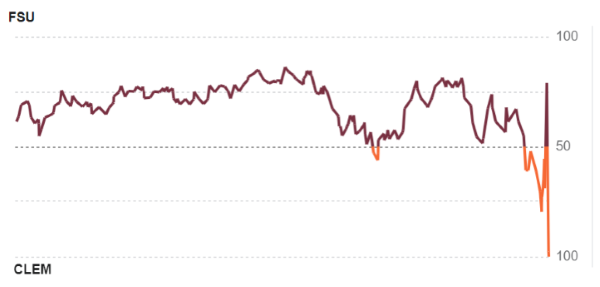 Source: ESPN

The above example is a win probability chart from a Florida St/Clemson game earlier this season. Before the game started, FSU was the favorite with about a 60% chance to win, but at the end of the game Clemson made a layup to give them the victory in the final second, resulting in the jump in odds in Clemson's favor in the final second of the graph.

These win probability graphs have been used to show the odds of unlikely comebacks and give fans an idea of how improbable some outcomes have been. One famous example is the graph of Super Bowl LI in which the Patriots won despite having less than a 1% chance at one point in the game.

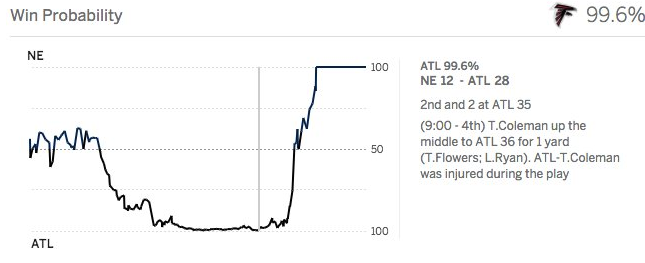 Source: ESPN

Despite the insights that these models provide to users, there has been little published work about their accuracy. Previous looks at these models<sup>1</sup> have examined the lack of context (did a player get injured halfway through the game?), prediction uncertainty, and available datasets and models from which to compare. While most models are proprietary, published models can give an insight into what data goes into the calculations. The below table shows predictor variables from an NFL win probability model from Lock and Nettleton<sup>2</sup>.

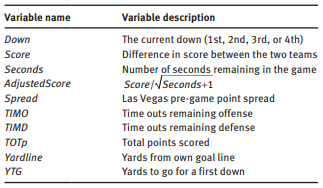

To summarize the variables that the model uses to generate win probabilities, there is current game state information (score, possession, location of ball, time on the clock, etc.) and the Vegas pre-game point spread. Other than these two things, the model lacks any context. While this is likely enough information to generate decently accurate live odds, it ignores critical information such as which players are in the game. Additionally, team specific information, like that a team usually performs much better in the second half (which we've boiled down to a single metric with resilience!) is completely left out of the model.

<p style="font-size:13px"><sup>1</sup> <a href="http://www.sloansportsconference.com/wp-content/uploads/2018/02/2011.pdf">http://www.sloansportsconference.com/wp-content/uploads/2018/02/2011.pdf</a><br>
<sup>2</sup> <a href="http://homepage.divms.uiowa.edu/~dzimmer/sports-statistics/nettletonandlock.pdf">http://homepage.divms.uiowa.edu/~dzimmer/sports-statistics/nettletonandlock.pdf</a></p>

Since we've shown that resilience has a measurable impact on in-game win probabilities, including it as a feature in win probability models would only improve their accuracy. Further work will need to be done, and datasets to be made available, to assess the significance of any improvement that including resilience provides, but the prior matrices showing the differences in halftime win probabilities as a result of resilience (6% and 8%) provide a clue as to the magnitude of the improvement.

# 7. Conclusions

The calculation of resilience and use of it to supplement win probability models can certainly extend beyond college basketball, to include professional basketball, the NFL, college football, and more. Basketball is uniquely suited for our current resilience calculation because of the frequent and consistent scoring, but adaptation of point differential trend analysis to create metrics for other sports would not be a difficult task. Further analysis will need to be conducted to verify that the phenomena translates across sports with the same level of significance.

Additionally, while resilience is easier for humans to interpret as a single score that can be used to directly compare teams, more complex win probability models could take the entire point differential array (each 2.5 minute average over the course of the game) as a training input. Including the more precise data would allow models to learn the specific interactions between varying point differentials at different points in the game.

To summarize the findings:
* A resilience metric, calculated using point differential trends, was shown to have significant impact on mid-game win probabilities.
* Resilience has no impact on pre-game win probabilities. Teams that perform well at the start of games are overall just as successful as teams that perform well at the end of games.
* Predictively, tournament games are very similar to regular season games.
* The ebbs and flows of basketball games can be partially explained by the difference in resiliencies between teams.
* Win probability models lack important contextual information (one part of which can be summarized with resilience), that when included, could lead to more accurate probabilities.

Although use cases for resilience are focused on mid-game prediction, from a fan's perspective, resilience adds another interesting dynamic. Knowing to what extent teams are better in the first or second half gives fans something new to consider when filling out their brackets, as teams assess their chances as a game progresses, or as bettors make wagers at halftime. 